In [2]:
# načtení dat
import pandas as pd

# reading the CSV file
data = pd.read_csv('All_N_rex 5 nm SR 895.csv', sep = ';', header = 0)
df = pd.DataFrame(data)

# vyber kompletnich
df.dropna(axis = 0, how = 'any', inplace = True)

# ulozim si labely abych je pak mohla nalepit
ROI = df.loc[:,"ROI name"]

# odstranim ty popisky
df= df.drop(columns = ['ROI name'])

# pruzkum sloupcu - ktere jsou vadne
"""for i in range(df.shape[1]):
    try:
        df.loc[:,df.columns[i]].astype(float)
    except ValueError as ve:
        print(df.columns[i])
 skoro vsechny - podivala jsem se v R u nekterych techu jsou tady hodnoty I.97... asi jsou to chybné values, vyhodim je, pak se zeptam Renci"""

 # pruzkum radku - ktere jsou vadne
bad_row = []
bad_row_counter = 0
for i in range(df.shape[0]):
    try:
        df.loc[i,:].astype(float)
    except ValueError as ve:
        bad_row_counter += 1
        bad_row.append(i)

"""86 radku obsahuje tady tuto chybu => vyhodim tyto radky (overime pak, jestli muzu)"""

# prilepit zpatky ROI

df['ROI'] = ROI

# odhodit radky kde je divnotyp
df = df.drop(bad_row)

# pretypovat
for i in range(3,97):
    try:
        df.loc[:,df.columns[i]] = df.loc[:,df.columns[i]].astype(float)
    except ValueError as ve:
        print(df.columns[i])

# rozdelit na barvicky
blue = df.loc[df['ROI'] == 'blue']
green = df.loc[df['ROI'] == 'green']
dry = df.loc[df['ROI'] == 'dry']
tech = df.loc[df['ROI'] == 'tech']
soil = df.loc[df['ROI'] == 'soil']

blue= blue.drop(columns = ['ROI'])
dry= dry.drop(columns = ['ROI'])
green= green.drop(columns = ['ROI'])
tech= tech.drop(columns = ['ROI'])
soil= soil.drop(columns = ['ROI'])

C:\Users\h337\AppData\Local\Temp/ipykernel_12920/2839327871.py:5: DtypeWarning: Columns (6,8,10,11,12,16,17,19,20,23,24,25,27,29,33,34,36,38,39,40,41,42,43,44,48,49,50,53,54,55,56,58,59,60,61,63,64,65,68,69,73,74,75,76,79,81,82,83,84,85,86,88,89,90,91,92,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('All_N_rex 5 nm SR 895.csv', sep = ';', header = 0)
C:\Users\h337\AppData\Local\Temp/ipykernel_12920/2839327871.py:47: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,df.columns[i]] = df.loc[:,df.columns[i]].astype(float)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

output = df['ROI']
input = df.loc[:, ~df.columns.isin(['Tray', 'ROI'])]

X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.9758902371322071


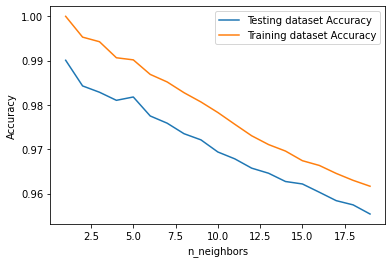

In [6]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

fig, ax = plt.subplots()  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
fig.savefig('KNN.png', facecolor='w') # uložení